# ORF307: Homework 2

## Q1: Least Angle Property and Orthogonality Principle of Least Squares

The problem is listed above in the written portion.

## Q2: Matrix Inversion Lemma

The problem is listed above in the written portion.

## Q3: Moore's Law

In [35]:
# Import required packages for coding exercises
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import cholesky as llt
seed = 1
np.random.seed(seed) # We use np.random.seed for reproducible results

For convenience we have included the following function `lstsq` that solves the least squares problem as we have seen in class returning `x` and factorization `L`.

In [36]:
def forward_substitution(L, b):
    n = L.shape[0]
    x = np.zeros(n)
    for i in range(n):
        x[i] = (b[i] - L[i,:i] @ x[:i])/L[i, i]
    return x

def backward_substitution(U, b):
    n = U.shape[0]
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (b[i] - U[i,i+1:] @ x[i+1:])/U[i, i]
    return x

def lstsq(A, b):
    M = A.T.dot(A)  # Form Gram matrix
    q = A.T.dot(b)  # Form right hand side
    L = llt(M)      # Factor
    x = forward_substitution(L, q)
    x = backward_substitution(L.T, x)
    return x, L

The figure and table below show the number of transistors $N$ in $13$ microprocessors, and the year of their introduction.

In [37]:
# Data
t = np.array([1971, 1972, 1974, 1978, 1982, 1985, 1989, 1993, 1997, 1999, 2000, 2002, 2003])
N = np.array([2250, 2500, 5000, 29000, 120000, 275000, 1180000, 3100000, 7500000, 24000000, 42000000, \
              220000000, 410000000])

# Show data as dataframe
# NB. Jupyter makes a nice table out of a pandas dataframe
pd.DataFrame({'t': t, 
              'N': N})

,t,N
0,1971,2250
1,1972,2500
2,1974,5000
3,1978,29000
4,1982,120000
5,1985,275000
6,1989,1180000
7,1993,3100000
8,1997,7500000
9,1999,24000000


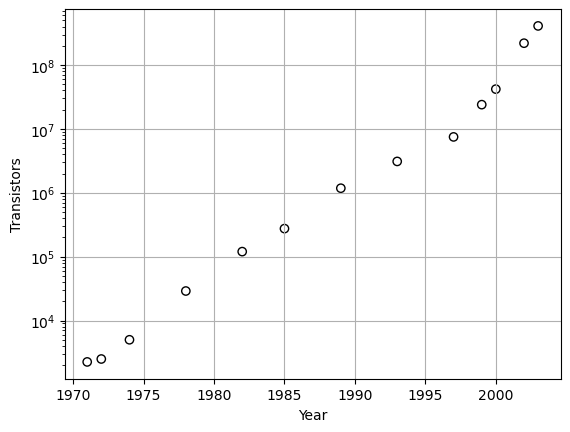

In [38]:
fig, ax = plt.subplots(1,1)
ax.scatter(t, N, marker='o', color='k', facecolors='none')
ax.set_xlabel(r'Year')
ax.set_ylabel(r'Transistors')
ax.set_yscale('log')
ax.grid('on')

The plot gives the number of transistors on a logarithmic scale. Find the least squares
straight-line fit of the data using the model
$$
\log_{10} N \approx \theta_1 + \theta_2(t - 1970),
$$
where $t$ is the year and $N$ is the number of transistors. Note that $\theta_1$ is the model's
prediction of the $\log$ of the number of transistors in 1970, and $10^{\theta_2}$ gives the model's
prediction of the fractional increase in number of transistors per year.



(a) Find the coefficients $\theta_1$ and $\theta_2$ that minimize the mean square error on the data using the `lstsq` function above. Give
the mean square error on the data. Plot the model you find along with the data points.

θ_1 = 3.125592633829349   θ_2 = 0.15401817984382243
MSE:  0.041240140870557045


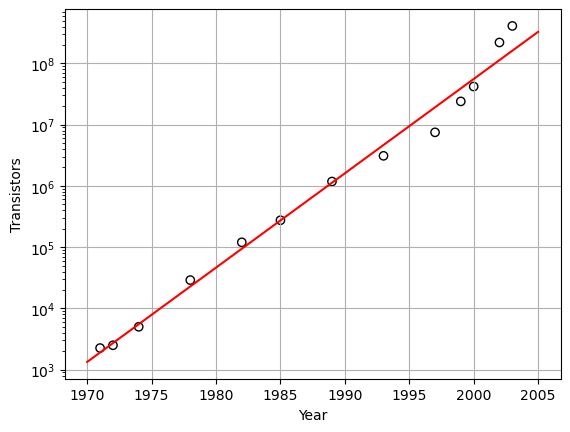

In [43]:
# Question 3 Part (a) Coding Portion

# Coefficient Calculations
y = np.log10(N)
A = np.column_stack([np.ones_like(t), t - 1970])
theta, L = lstsq(A, y)
theta1, theta2 = theta
print("θ_1 =", theta1, "  θ_2 =", theta2)

# MSE Calculation
y_pred = A @ theta
mse = np.mean((y - y_pred)**2)
print("MSE: ", mse)

# Plot the model

fig, ax = plt.subplots(1,1)
ax.scatter(t, N, marker='o', color='k', facecolors='none')
tt = np.linspace(1970, 2005, 200)
ax.plot(tt, 10**(theta1 + theta2*(tt - 1970)), 'r-')
ax.set_xlabel(r'Year')
ax.set_ylabel(r'Transistors')
ax.set_yscale('log')
ax.grid('on')

(b) The first point-contact transistor was invented in 1947. Now let $N=1$, where $\log_{10}N=0$, and then find $t$. See if your model fits the historical data well.

In [40]:
# Question 3 Part (b) Coding Portion

# N = 1
t_one = 1970 - theta1/theta2
print("Predicted year when N=1:", t_one)

Predicted year when N=1: 1949.7063396217332


**Answer:** Our model fits the historical data reasonably well, with a predicted year of 1950 compared to the actual year of 1947.

(c) Use your model to predict the number of transistors in a microprocessor introduced
in 2015. Compare the prediction to the IBM Z13 microprocessor, released in 2015, which has around $4\times 10^9$ transistors.

In [41]:
# Question 3 Part (c) Coding Portion

# N in 2025
logN_2015 = theta1 + theta2*(2015 - 1970)
N_2015 = 10**logN_2015
IBM_Z13 = 4e9
diff = N_2015 - IBM_Z13
print(f"Predicted N in 2015: {N_2015:.2e}")
print(f"IBM Z13 actual: {IBM_Z13:.2e}")
print(f"Difference: {diff:.2e}")

Predicted N in 2015: 1.14e+10
IBM Z13 actual: 4.00e+09
Difference: 7.39e+09


**Answer:** The prediction, compared to part (b), is wildly off with a magnitude of 10. Essentially, the results indicate that extrapolation far from the trained data set leads to inaccurate, unreliable results.

(d) Compare your result with Moore's law, which states that the number of transistors per integrated circuit roughly doubles every one and a half to two years.

In [42]:
# Question 3 Part (d) Coding Portion

# Comparisons
g = 10**theta2
tau = np.log10(2)/theta2
print("Annual growth factor:", g)
print("Doubling time (years):", tau)

Annual growth factor: 1.4256672716937808
Doubling time (years): 1.9545094999124892


**Answer:** The model has a doubling time of 1.95 years and an annual growth factor of 1.43, which is aligned with Moore's law that states the number of transistors per integrated circuit roughly doubles, as 1.95 is between 1.5 and 2 years.